In [1]:
import os
import subprocess
import sys
sys.path.append('../sdpm_py_util')
sys.path.append('../web_util')
import plotting_functions as pltfuns
import netCDF4 as nc
import web_functions as webfuns
import matplotlib.pyplot as plt
import numpy as np

/home/mspydell/models/PFM_root/PFM/web_util/../sdpm_py_util/plotting_functions.py:2104: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  all_observed_v2 = [t if t is not '' else '-9999' for t in all_observed_v]
/home/mspydell/models/PFM_root/PFM/web_util/../sdpm_py_util/plotting_functions.py:2105: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  all_predicted_v2 = [t if t is not '' else '-9999' for t in all_predicted_v]


In [2]:

fn_grd = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'
fn_his = '/scratch/PFM_Simulations/LV4_Forecast/His/LV4_ocean_his_202504140000.nc'
fn_web = '/scratch/PFM_Simulations/LV4_Forecast/His/web_data_2025041400.nc'


In [7]:
ds = nc.Dataset(fn_web)
print(ds.variables.keys())
print(ds.variables['thresh_holds'][:])

dict_keys(['shoreline_dye_tot', 'shoreline_risk', 'map_dye_tot', 'sites_dye_tot', 'sites_risk', 'map_lat', 'map_lon', 'shoreline_lat', 'shoreline_lon', 'time', 'sites_lat', 'sites_lon', 'thresh_holds'])
[-4.5 -3. ]


In [3]:
webfuns.full_his_to_essential(fn_his,fn_grd)


In [4]:

cmd_list = ['python','-W','ignore','web_functions.py','full_his_to_essential',fn_his,fn_grd]
os.chdir('../web_util')
ret6 = subprocess.run(cmd_list)   
print('...done making web nc file: ' + str(ret6.returncode) + ' (0=good)') 

...done making web nc file: 0 (0=good)


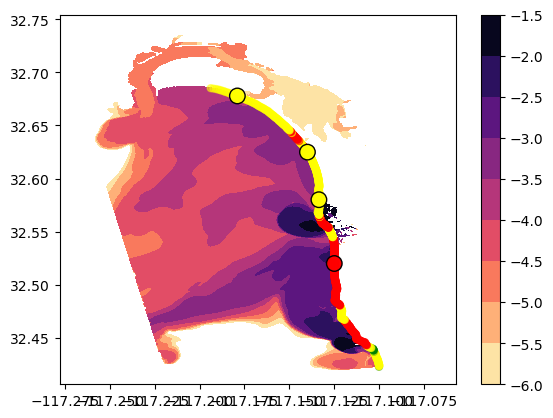

In [12]:
ds = nc.Dataset(fn_web)
shore = dict()
dye = dict()
sites = dict()
shore['Lat'] = ds.variables['shoreline_lat'][:]
shore['Lon'] = ds.variables['shoreline_lon'][:]
shore['Risk'] = ds.variables['shoreline_risk'][:]
dye['Lat'] = ds.variables['map_lat'][:]
dye['Lon'] = ds.variables['map_lon'][:]
dye['Dye_tot'] = ds.variables['map_dye_tot'][:]
sites['Lat'] = ds.variables['sites_lat'][:]
sites['Lon'] = ds.variables['sites_lon'][:]
sites['Risk'] = ds.variables['sites_risk'][:]


iit = 110 # the time index
# make the risk colormap
color_map = {
    0: 'green',
    1: 'yellow',
    2: 'red'
}
# associate the colormap with the numbers
# the .nc data is in 3 dictionaries
colors = [color_map[number] for number in shore['Risk'][iit,:]]
colors2 = [color_map[number] for number in sites['Risk'][iit,:]]

cmap = plt.get_cmap('magma_r')
plevs = np.arange(-6,-1,.5)

fig, ax = plt.subplots()
dye2 = dye['Dye_tot'][iit,:,:]
msk = dye2==0
dye2[msk]=0.0000000001
l10dye = np.log10(dye2)
cset=ax.contourf(dye['Lon'],dye['Lat'],l10dye, plevs, cmap=cmap)
cbar = fig.colorbar(cset, ax=ax, orientation='vertical', pad = 0.05)
ax.scatter(shore['Lon'],shore['Lat'], s=25, c=colors, alpha=0.5)
ax.scatter(sites['Lon'],sites['Lat'], s=125, c=colors2, alpha=0.99 , edgecolors='black', linewidths=1)


/tmp/ipykernel_2369114/18900449.py:10: RuntimeWarning: invalid value encountered in divide
  dye2 = WW1 / Q2


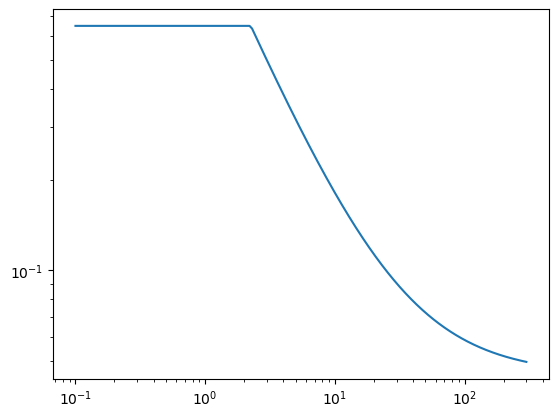

In [15]:
## test river stuff here
Q2 = np.arange(0,300,.1)
R1 = 0.65
R2 = 0.045
Q00 = 2.25
WW1 = R1*Q2
WW2 = R2*Q2 + (R1-R2)*Q00
msk = Q2>Q00
WW1[msk] = WW2[msk]
dye2 = WW1 / Q2


fig, ax = plt.subplots()
ax.loglog(Q2,dye2)
